Importing dependancies

In [0]:
import torch
from torch import optim
from torch import nn
import matplotlib.pyplot as plt


In [0]:
import pandas as pd
import numpy as np


In [0]:
from torchvision import datasets,transforms

In [0]:
torch.manual_seed(7)
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,05.))])
trainset=datasets.MNIST('mnistTrain/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

Processing...
Done!


In [0]:
torch.manual_seed(7)
testset=datasets.MNIST('mnistTest/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

Processing...
Done!


In [0]:
image,label=next(iter(trainloader))
imageTest,labelTest=next(iter(testloader))

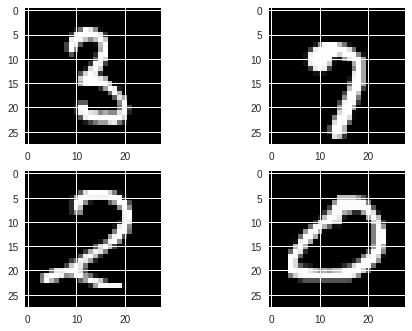

In [0]:
plt.subplot(221)
plt.imshow(image[10].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(image[9].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(image[2].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(image[0].view(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
model3=nn.Sequential(nn.Linear(784,256),
                   nn.ReLU(),
                   nn.Linear(256,64), 
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1)
                   )
model2=nn.Sequential(nn.Linear(784,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1)
                    )

In [0]:
torch.save(model3.state_dict(), 'initial3.pth')
torch.save(model2.state_dict(), 'initial2.pth')

### learning rate: 0.004 

In [0]:


def train(lr,m,df):

  criterion=nn.NLLLoss()
  epochs=10
  optimizer=optim.SGD(model3.parameters(),lr=lr,momentum=m)
  accuracy_test=[]
  errorTrain=[]
  errorTest=[]
  print ("Learning rate:{} momentum:{}".format(lr,m))
  torch.manual_seed(7)
  for e in range(epochs):

      running_loss=0;
      validation_loss=0;
      accuracy=0;
      for images,labels in trainloader:
          optimizer.zero_grad()
          logits=model3(images.view(images.shape[0],-1))
          loss=criterion(logits,labels)
          loss.backward()
          optimizer.step()
          running_loss+=loss

      
      for imageTest,labelTest in testloader:
          with torch.no_grad():
              logits_test=model3(imageTest.view(imageTest.shape[0],-1))
          lossTest=criterion(logits_test,labelTest)
          validation_loss+=lossTest
          ps=torch.exp(logits)
          top_p,top_class=ps.topk(1,dim=1)
          equals=top_class==labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))

      else:
          print("Epoch: {}/{}.. ".format(e+1, epochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
                "Test Loss: {:.3f}.. ".format(validation_loss/len(testloader)),
                "Test Accuracy: {:.3f}".format((accuracy/len(testloader))*100))
          errorTest.append(validation_loss/len(testloader))
          errorTrain.append(running_loss/len(trainloader))
          accuracy_test.append((accuracy/len(testloader))*100)
          
          
  df_acc=pd.DataFrame(np.array(accuracy_test).reshape(1,10),columns=['Epoch'+str(i+1) for i in range(10)])
  df=pd.concat([df,df_acc])
  df['mean_accuracy']=df.mean(axis=1)
  df['std_dev']=df.std(axis=1)
  plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
  plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
  plt.legend()
  plt.title('Error vs epochs plot when learning rate={} and momentum={}'.format(lr,m))
  plt.xlabel('number of epochs')
  plt.ylabel('error')
  plt.savefig("model_3_"+str(lr)+"_"+str(m)+".png") 
  plt.show()
  plt.clf()




Learning rate:0.001 momentum:0.9
Epoch: 1/10..  Training Loss: 1.108..  Test Loss: 0.438..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.389..  Test Loss: 0.335..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.327..  Test Loss: 0.292..  Test Accuracy: 87.500
Epoch: 4/10..  Training Loss: 0.293..  Test Loss: 0.270..  Test Accuracy: 93.750
Epoch: 5/10..  Training Loss: 0.266..  Test Loss: 0.244..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.241..  Test Loss: 0.222..  Test Accuracy: 93.750
Epoch: 7/10..  Training Loss: 0.220..  Test Loss: 0.206..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.201..  Test Loss: 0.191..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.184..  Test Loss: 0.177..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.168..  Test Loss: 0.168..  Test Accuracy: 96.875


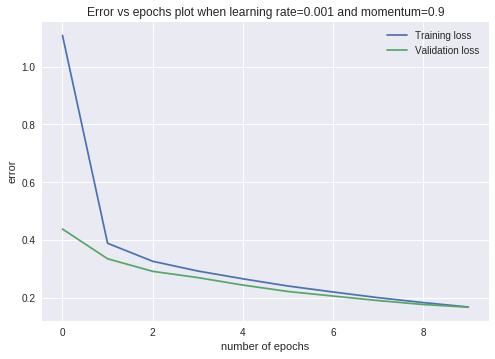

Learning rate:0.001 momentum:0.8
Epoch: 1/10..  Training Loss: 1.579..  Test Loss: 0.738..  Test Accuracy: 84.375
Epoch: 2/10..  Training Loss: 0.554..  Test Loss: 0.430..  Test Accuracy: 93.750
Epoch: 3/10..  Training Loss: 0.406..  Test Loss: 0.358..  Test Accuracy: 87.500
Epoch: 4/10..  Training Loss: 0.358..  Test Loss: 0.329..  Test Accuracy: 90.625
Epoch: 5/10..  Training Loss: 0.332..  Test Loss: 0.309..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.312..  Test Loss: 0.290..  Test Accuracy: 93.750
Epoch: 7/10..  Training Loss: 0.296..  Test Loss: 0.278..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.282..  Test Loss: 0.267..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.269..  Test Loss: 0.257..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.256..  Test Loss: 0.248..  Test Accuracy: 96.875


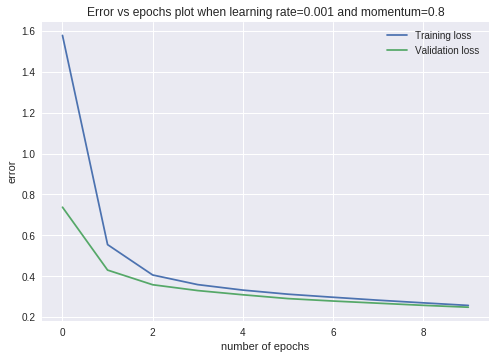

Learning rate:0.001 momentum:0.7
Epoch: 1/10..  Training Loss: 1.883..  Test Loss: 1.167..  Test Accuracy: 81.250
Epoch: 2/10..  Training Loss: 0.793..  Test Loss: 0.561..  Test Accuracy: 87.500
Epoch: 3/10..  Training Loss: 0.498..  Test Loss: 0.425..  Test Accuracy: 87.500
Epoch: 4/10..  Training Loss: 0.414..  Test Loss: 0.375..  Test Accuracy: 87.500
Epoch: 5/10..  Training Loss: 0.375..  Test Loss: 0.346..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.350..  Test Loss: 0.325..  Test Accuracy: 90.625
Epoch: 7/10..  Training Loss: 0.333..  Test Loss: 0.312..  Test Accuracy: 93.750
Epoch: 8/10..  Training Loss: 0.319..  Test Loss: 0.301..  Test Accuracy: 87.500
Epoch: 9/10..  Training Loss: 0.307..  Test Loss: 0.292..  Test Accuracy: 90.625
Epoch: 10/10..  Training Loss: 0.297..  Test Loss: 0.284..  Test Accuracy: 90.625


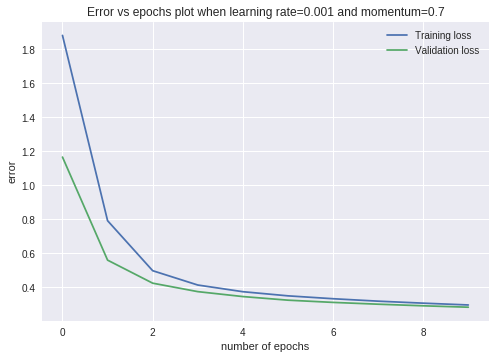

Learning rate:0.002 momentum:0.9
Epoch: 1/10..  Training Loss: 0.779..  Test Loss: 0.357..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.318..  Test Loss: 0.279..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.260..  Test Loss: 0.227..  Test Accuracy: 90.625
Epoch: 4/10..  Training Loss: 0.216..  Test Loss: 0.190..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.183..  Test Loss: 0.164..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.157..  Test Loss: 0.141..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.138..  Test Loss: 0.128..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.122..  Test Loss: 0.117..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.109..  Test Loss: 0.112..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.098..  Test Loss: 0.104..  Test Accuracy: 96.875


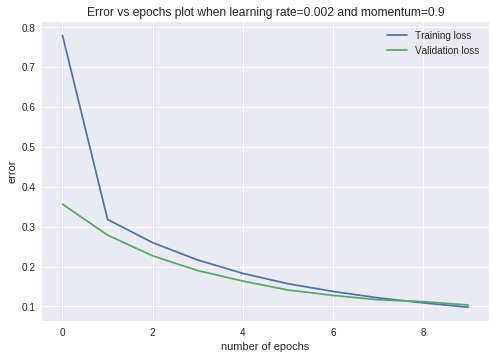

Learning rate:0.002 momentum:0.8
Epoch: 1/10..  Training Loss: 1.086..  Test Loss: 0.439..  Test Accuracy: 87.500
Epoch: 2/10..  Training Loss: 0.388..  Test Loss: 0.334..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.326..  Test Loss: 0.292..  Test Accuracy: 87.500
Epoch: 4/10..  Training Loss: 0.293..  Test Loss: 0.269..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.266..  Test Loss: 0.247..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.241..  Test Loss: 0.222..  Test Accuracy: 93.750
Epoch: 7/10..  Training Loss: 0.220..  Test Loss: 0.206..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.201..  Test Loss: 0.189..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.184..  Test Loss: 0.175..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.169..  Test Loss: 0.163..  Test Accuracy: 96.875


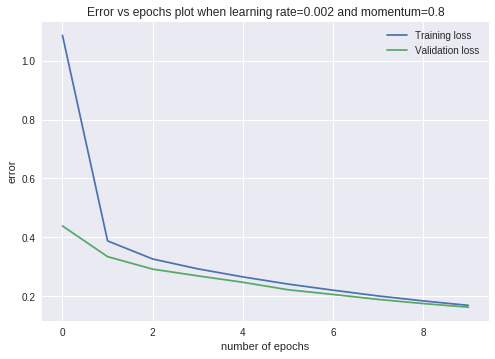

Learning rate:0.002 momentum:0.7
Epoch: 1/10..  Training Loss: 1.349..  Test Loss: 0.565..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.461..  Test Loss: 0.378..  Test Accuracy: 93.750
Epoch: 3/10..  Training Loss: 0.366..  Test Loss: 0.327..  Test Accuracy: 87.500
Epoch: 4/10..  Training Loss: 0.330..  Test Loss: 0.304..  Test Accuracy: 93.750
Epoch: 5/10..  Training Loss: 0.305..  Test Loss: 0.286..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.285..  Test Loss: 0.265..  Test Accuracy: 93.750
Epoch: 7/10..  Training Loss: 0.268..  Test Loss: 0.253..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.251..  Test Loss: 0.238..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.236..  Test Loss: 0.225..  Test Accuracy: 90.625
Epoch: 10/10..  Training Loss: 0.222..  Test Loss: 0.213..  Test Accuracy: 96.875


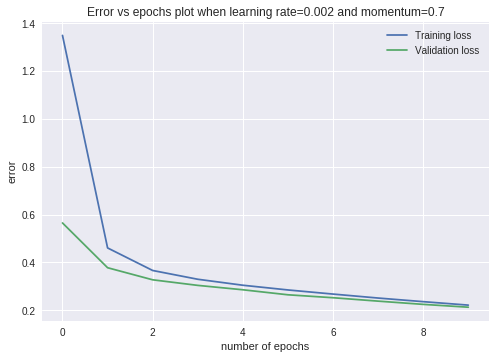

Learning rate:0.004 momentum:0.9
Epoch: 1/10..  Training Loss: 0.585..  Test Loss: 0.293..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.249..  Test Loss: 0.213..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.182..  Test Loss: 0.154..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.143..  Test Loss: 0.129..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.116..  Test Loss: 0.106..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.099..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.085..  Test Loss: 0.089..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.074..  Test Loss: 0.079..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.066..  Test Loss: 0.084..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.058..  Test Loss: 0.075..  Test Accuracy: 96.875


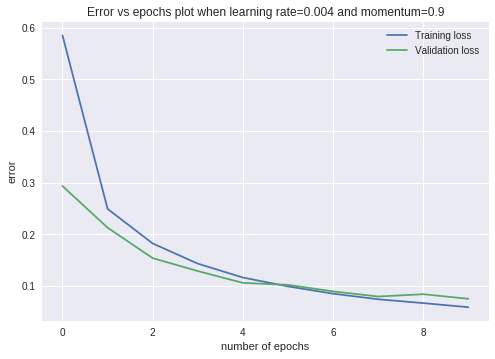

Learning rate:0.004 momentum:0.8
Epoch: 1/10..  Training Loss: 0.758..  Test Loss: 0.348..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.317..  Test Loss: 0.276..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.257..  Test Loss: 0.225..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.215..  Test Loss: 0.190..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.181..  Test Loss: 0.168..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.156..  Test Loss: 0.140..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.136..  Test Loss: 0.129..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.120..  Test Loss: 0.117..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.108..  Test Loss: 0.109..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.098..  Test Loss: 0.102..  Test Accuracy: 96.875


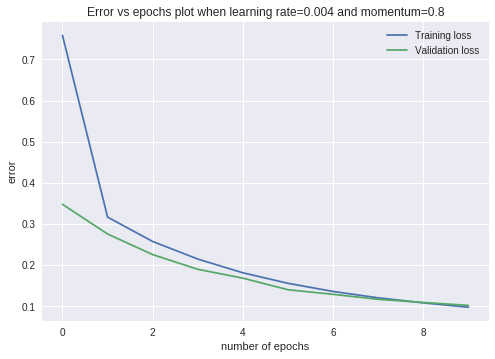

Learning rate:0.004 momentum:0.7
Epoch: 1/10..  Training Loss: 0.919..  Test Loss: 0.390..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.355..  Test Loss: 0.308..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.300..  Test Loss: 0.270..  Test Accuracy: 90.625
Epoch: 4/10..  Training Loss: 0.263..  Test Loss: 0.240..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.231..  Test Loss: 0.216..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.205..  Test Loss: 0.184..  Test Accuracy: 96.875
Epoch: 7/10..  Training Loss: 0.182..  Test Loss: 0.170..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.164..  Test Loss: 0.155..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.148..  Test Loss: 0.141..  Test Accuracy: 90.625
Epoch: 10/10..  Training Loss: 0.135..  Test Loss: 0.131..  Test Accuracy: 96.875


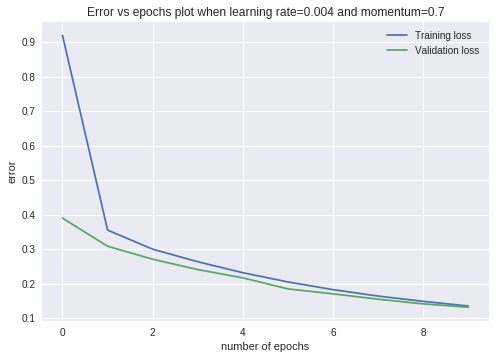

Learning rate:0.003 momentum:0.9
Epoch: 1/10..  Training Loss: 0.653..  Test Loss: 0.322..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.279..  Test Loss: 0.240..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.213..  Test Loss: 0.180..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.170..  Test Loss: 0.147..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.140..  Test Loss: 0.125..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.119..  Test Loss: 0.115..  Test Accuracy: 96.875
Epoch: 7/10..  Training Loss: 0.103..  Test Loss: 0.100..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.090..  Test Loss: 0.091..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.080..  Test Loss: 0.091..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.072..  Test Loss: 0.082..  Test Accuracy: 96.875


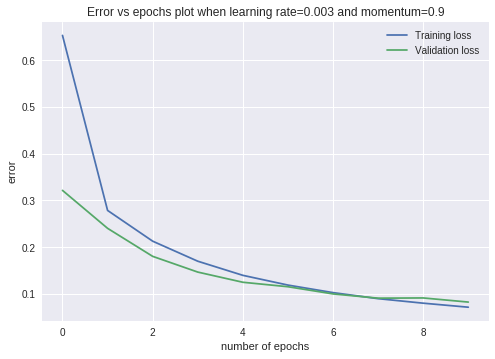

Learning rate:0.003 momentum:0.8
Epoch: 1/10..  Training Loss: 0.873..  Test Loss: 0.376..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.344..  Test Loss: 0.300..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.288..  Test Loss: 0.256..  Test Accuracy: 87.500
Epoch: 4/10..  Training Loss: 0.250..  Test Loss: 0.225..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.217..  Test Loss: 0.201..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.189..  Test Loss: 0.170..  Test Accuracy: 96.875
Epoch: 7/10..  Training Loss: 0.168..  Test Loss: 0.156..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.150..  Test Loss: 0.140..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.135..  Test Loss: 0.130..  Test Accuracy: 90.625
Epoch: 10/10..  Training Loss: 0.122..  Test Loss: 0.120..  Test Accuracy: 96.875


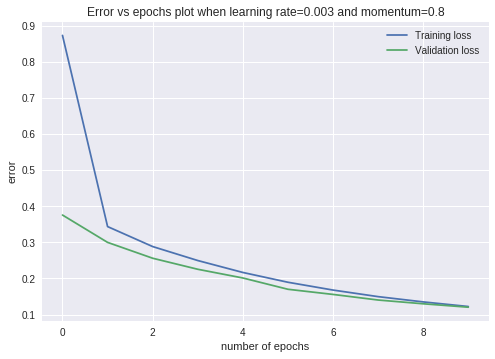

Learning rate:0.003 momentum:0.7
Epoch: 1/10..  Training Loss: 1.076..  Test Loss: 0.437..  Test Accuracy: 87.500
Epoch: 2/10..  Training Loss: 0.388..  Test Loss: 0.333..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.326..  Test Loss: 0.294..  Test Accuracy: 90.625
Epoch: 4/10..  Training Loss: 0.293..  Test Loss: 0.270..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.265..  Test Loss: 0.249..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.241..  Test Loss: 0.222..  Test Accuracy: 93.750
Epoch: 7/10..  Training Loss: 0.220..  Test Loss: 0.207..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.200..  Test Loss: 0.189..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.184..  Test Loss: 0.174..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.169..  Test Loss: 0.161..  Test Accuracy: 96.875


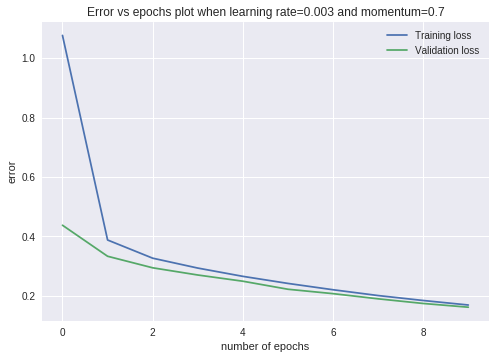

Learning rate:0.006 momentum:0.9
Epoch: 1/10..  Training Loss: 0.507..  Test Loss: 0.242..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.206..  Test Loss: 0.180..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.146..  Test Loss: 0.130..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.115..  Test Loss: 0.101..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.093..  Test Loss: 0.099..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.079..  Test Loss: 0.093..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.069..  Test Loss: 0.079..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.060..  Test Loss: 0.078..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.053..  Test Loss: 0.082..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.047..  Test Loss: 0.073..  Test Accuracy: 100.000


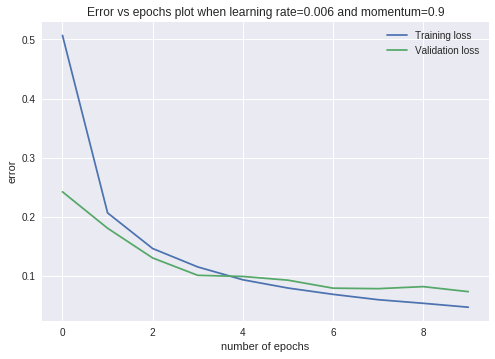

Learning rate:0.006 momentum:0.8
Epoch: 1/10..  Training Loss: 0.634..  Test Loss: 0.309..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.278..  Test Loss: 0.232..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.210..  Test Loss: 0.181..  Test Accuracy: 100.000
Epoch: 4/10..  Training Loss: 0.168..  Test Loss: 0.147..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.139..  Test Loss: 0.127..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.117..  Test Loss: 0.113..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.101..  Test Loss: 0.101..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.089..  Test Loss: 0.098..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.079..  Test Loss: 0.088..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.071..  Test Loss: 0.090..  Test Accuracy: 96.875


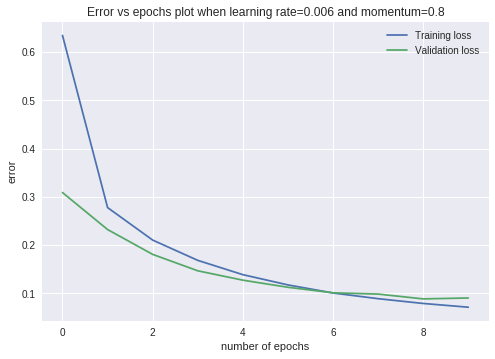

Learning rate:0.006 momentum:0.7
Epoch: 1/10..  Training Loss: 0.750..  Test Loss: 0.350..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.316..  Test Loss: 0.274..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.257..  Test Loss: 0.231..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.214..  Test Loss: 0.191..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.181..  Test Loss: 0.166..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.155..  Test Loss: 0.139..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.135..  Test Loss: 0.129..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.120..  Test Loss: 0.120..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.108..  Test Loss: 0.108..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.097..  Test Loss: 0.105..  Test Accuracy: 96.875


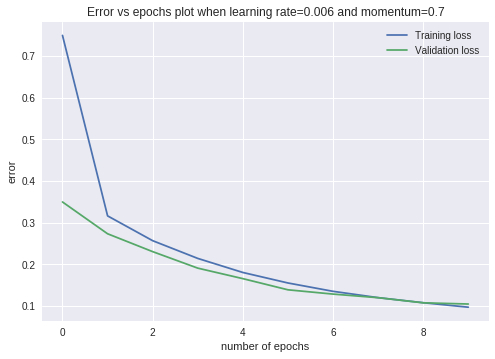

Learning rate:0.009 momentum:0.9
Epoch: 1/10..  Training Loss: 0.447..  Test Loss: 0.203..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.173..  Test Loss: 0.168..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.122..  Test Loss: 0.123..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.099..  Test Loss: 0.085..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.081..  Test Loss: 0.091..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.069..  Test Loss: 0.090..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.059..  Test Loss: 0.074..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.052..  Test Loss: 0.077..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.047..  Test Loss: 0.088..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.040..  Test Loss: 0.071..  Test Accuracy: 100.000


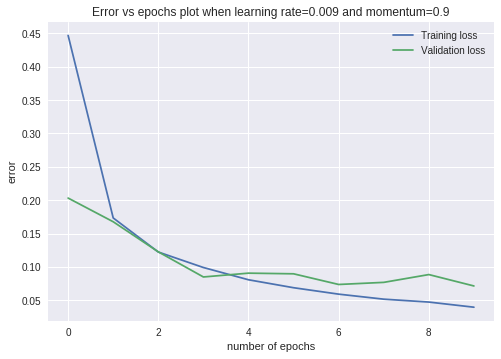

Learning rate:0.009 momentum:0.8
Epoch: 1/10..  Training Loss: 0.542..  Test Loss: 0.271..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.235..  Test Loss: 0.189..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.168..  Test Loss: 0.146..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.132..  Test Loss: 0.116..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.108..  Test Loss: 0.100..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.091..  Test Loss: 0.094..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.077..  Test Loss: 0.081..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.069..  Test Loss: 0.093..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.061..  Test Loss: 0.080..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.055..  Test Loss: 0.082..  Test Accuracy: 96.875


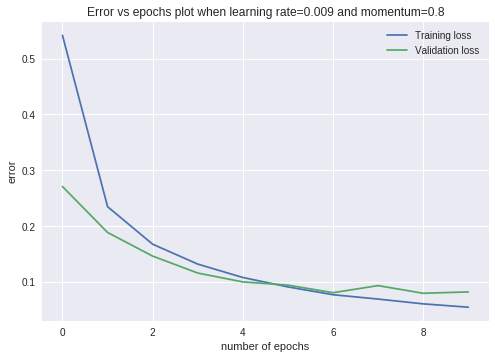

Learning rate:0.009 momentum:0.7
Epoch: 1/10..  Training Loss: 0.626..  Test Loss: 0.320..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.278..  Test Loss: 0.231..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.211..  Test Loss: 0.189..  Test Accuracy: 100.000
Epoch: 4/10..  Training Loss: 0.168..  Test Loss: 0.149..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.139..  Test Loss: 0.123..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.117..  Test Loss: 0.110..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.101..  Test Loss: 0.099..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.089..  Test Loss: 0.105..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.079..  Test Loss: 0.089..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.071..  Test Loss: 0.094..  Test Accuracy: 96.875


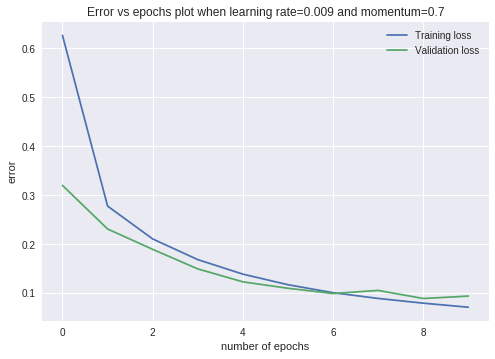

Learning rate:0.02 momentum:0.9
Epoch: 1/10..  Training Loss: 0.370..  Test Loss: 0.195..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.154..  Test Loss: 0.171..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.113..  Test Loss: 0.121..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.093..  Test Loss: 0.106..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.081..  Test Loss: 0.089..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.067..  Test Loss: 0.079..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.058..  Test Loss: 0.077..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.051..  Test Loss: 0.095..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.047..  Test Loss: 0.098..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.042..  Test Loss: 0.083..  Test Accuracy: 100.000


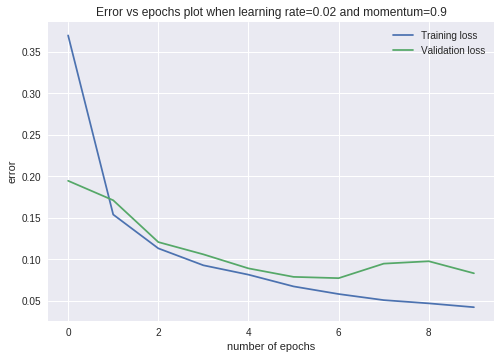

Learning rate:0.02 momentum:0.8
Epoch: 1/10..  Training Loss: 0.411..  Test Loss: 0.205..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.167..  Test Loss: 0.158..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.119..  Test Loss: 0.128..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.097..  Test Loss: 0.101..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.080..  Test Loss: 0.092..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.066..  Test Loss: 0.089..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.058..  Test Loss: 0.071..  Test Accuracy: 100.000
Epoch: 8/10..  Training Loss: 0.051..  Test Loss: 0.087..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.043..  Test Loss: 0.084..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.038..  Test Loss: 0.076..  Test Accuracy: 100.000


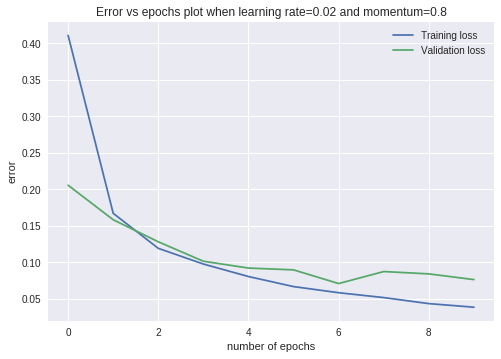

Learning rate:0.02 momentum:0.7
Epoch: 1/10..  Training Loss: 0.463..  Test Loss: 0.250..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.193..  Test Loss: 0.150..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.136..  Test Loss: 0.135..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.109..  Test Loss: 0.104..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.090..  Test Loss: 0.091..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.075..  Test Loss: 0.083..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.065..  Test Loss: 0.070..  Test Accuracy: 100.000
Epoch: 8/10..  Training Loss: 0.058..  Test Loss: 0.130..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.050..  Test Loss: 0.079..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.044..  Test Loss: 0.072..  Test Accuracy: 100.000


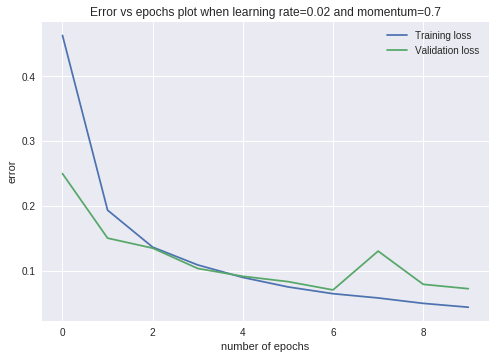

Learning rate:0.03 momentum:0.9
Epoch: 1/10..  Training Loss: 0.361..  Test Loss: 0.196..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.166..  Test Loss: 0.151..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.126..  Test Loss: 0.121..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.106..  Test Loss: 0.111..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.094..  Test Loss: 0.135..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.080..  Test Loss: 0.082..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.071..  Test Loss: 0.088..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.063..  Test Loss: 0.106..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.061..  Test Loss: 0.098..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.051..  Test Loss: 0.123..  Test Accuracy: 100.000


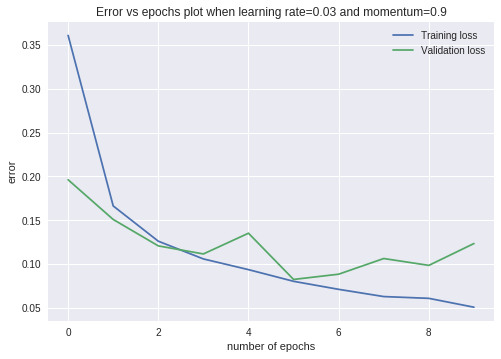

Learning rate:0.03 momentum:0.8
Epoch: 1/10..  Training Loss: 0.368..  Test Loss: 0.185..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.151..  Test Loss: 0.144..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.111..  Test Loss: 0.126..  Test Accuracy: 100.000
Epoch: 4/10..  Training Loss: 0.091..  Test Loss: 0.104..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.076..  Test Loss: 0.090..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.063..  Test Loss: 0.085..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.054..  Test Loss: 0.071..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.050..  Test Loss: 0.075..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.041..  Test Loss: 0.099..  Test Accuracy: 96.875
Epoch: 10/10..  Training Loss: 0.037..  Test Loss: 0.088..  Test Accuracy: 100.000


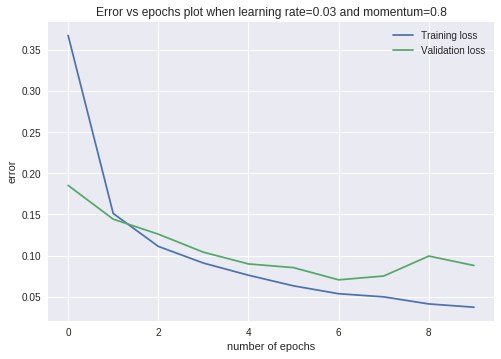

Learning rate:0.03 momentum:0.7
Epoch: 1/10..  Training Loss: 0.404..  Test Loss: 0.204..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.165..  Test Loss: 0.134..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.118..  Test Loss: 0.122..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.097..  Test Loss: 0.098..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.080..  Test Loss: 0.095..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.067..  Test Loss: 0.084..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.057..  Test Loss: 0.072..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.052..  Test Loss: 0.131..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.044..  Test Loss: 0.073..  Test Accuracy: 96.875
Epoch: 10/10..  Training Loss: 0.039..  Test Loss: 0.066..  Test Accuracy: 100.000


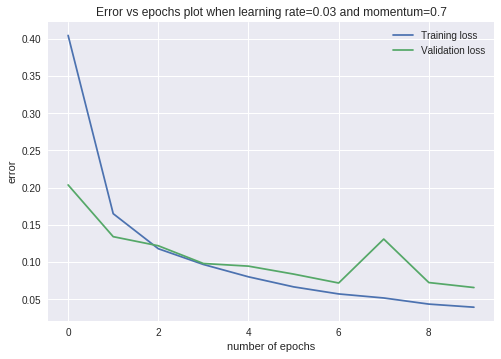

Learning rate:0.01 momentum:0.9
Epoch: 1/10..  Training Loss: 0.433..  Test Loss: 0.186..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.168..  Test Loss: 0.170..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.119..  Test Loss: 0.111..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.097..  Test Loss: 0.089..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.080..  Test Loss: 0.085..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.067..  Test Loss: 0.097..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.057..  Test Loss: 0.074..  Test Accuracy: 100.000
Epoch: 8/10..  Training Loss: 0.050..  Test Loss: 0.076..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.045..  Test Loss: 0.088..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.040..  Test Loss: 0.070..  Test Accuracy: 100.000


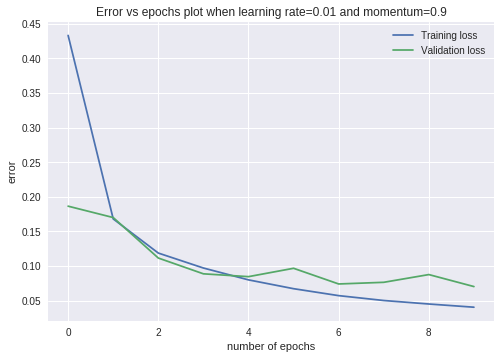

Learning rate:0.01 momentum:0.8
Epoch: 1/10..  Training Loss: 0.520..  Test Loss: 0.259..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.223..  Test Loss: 0.176..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.157..  Test Loss: 0.140..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.124..  Test Loss: 0.110..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.101..  Test Loss: 0.098..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.086..  Test Loss: 0.095..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.073..  Test Loss: 0.078..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.065..  Test Loss: 0.099..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.057..  Test Loss: 0.085..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.051..  Test Loss: 0.078..  Test Accuracy: 100.000


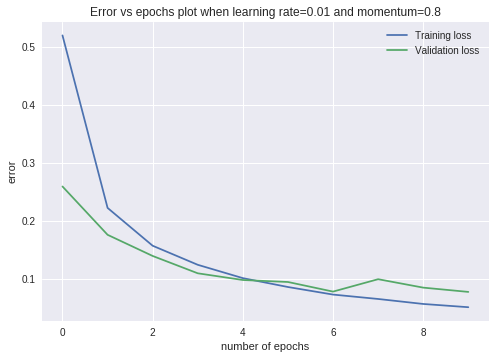

Learning rate:0.01 momentum:0.7
Epoch: 1/10..  Training Loss: 0.600..  Test Loss: 0.313..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.267..  Test Loss: 0.218..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.199..  Test Loss: 0.181..  Test Accuracy: 100.000
Epoch: 4/10..  Training Loss: 0.158..  Test Loss: 0.141..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.130..  Test Loss: 0.115..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.109..  Test Loss: 0.103..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.094..  Test Loss: 0.093..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.083..  Test Loss: 0.102..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.074..  Test Loss: 0.084..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.066..  Test Loss: 0.091..  Test Accuracy: 96.875


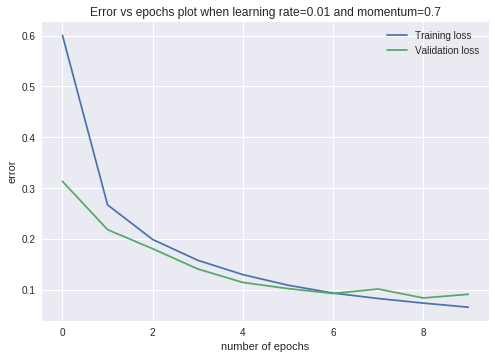

Learning rate:0.07 momentum:0.9
Epoch: 1/10..  Training Loss: 0.499..  Test Loss: 0.309..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.290..  Test Loss: 0.319..  Test Accuracy: 93.750
Epoch: 3/10..  Training Loss: 0.259..  Test Loss: 0.230..  Test Accuracy: 90.625
Epoch: 4/10..  Training Loss: 0.233..  Test Loss: 0.276..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.224..  Test Loss: 0.204..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.207..  Test Loss: 0.175..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.206..  Test Loss: 0.251..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.202..  Test Loss: 0.196..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.195..  Test Loss: 0.262..  Test Accuracy: 90.625
Epoch: 10/10..  Training Loss: 0.173..  Test Loss: 0.215..  Test Accuracy: 100.000


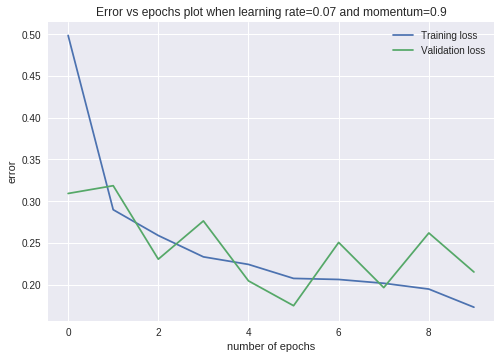

Learning rate:0.07 momentum:0.8
Epoch: 1/10..  Training Loss: 0.342..  Test Loss: 0.182..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.162..  Test Loss: 0.206..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.128..  Test Loss: 0.144..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.108..  Test Loss: 0.125..  Test Accuracy: 93.750
Epoch: 5/10..  Training Loss: 0.092..  Test Loss: 0.140..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.081..  Test Loss: 0.108..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.074..  Test Loss: 0.101..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.067..  Test Loss: 0.104..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.065..  Test Loss: 0.107..  Test Accuracy: 100.000
Epoch: 10/10..  Training Loss: 0.059..  Test Loss: 0.108..  Test Accuracy: 96.875


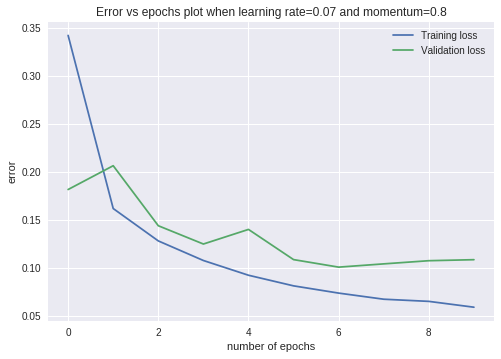

Learning rate:0.07 momentum:0.7
Epoch: 1/10..  Training Loss: 0.339..  Test Loss: 0.167..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.148..  Test Loss: 0.156..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.112..  Test Loss: 0.121..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.092..  Test Loss: 0.105..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.078..  Test Loss: 0.107..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.066..  Test Loss: 0.076..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.056..  Test Loss: 0.096..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.052..  Test Loss: 0.109..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.046..  Test Loss: 0.101..  Test Accuracy: 100.000
Epoch: 10/10..  Training Loss: 0.041..  Test Loss: 0.088..  Test Accuracy: 100.000


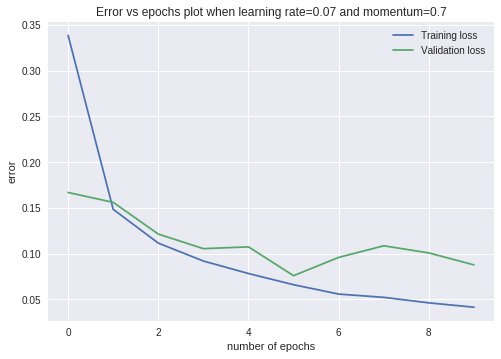

Learning rate:1 momentum:0.9
Epoch: 1/10..  Training Loss: 2.699..  Test Loss: 2.334..  Test Accuracy: 12.500
Epoch: 2/10..  Training Loss: 2.336..  Test Loss: 2.336..  Test Accuracy: 6.250
Epoch: 3/10..  Training Loss: 2.340..  Test Loss: 2.349..  Test Accuracy: 0.000
Epoch: 4/10..  Training Loss: 2.338..  Test Loss: 2.335..  Test Accuracy: 12.500
Epoch: 5/10..  Training Loss: 2.334..  Test Loss: 2.315..  Test Accuracy: 3.125
Epoch: 6/10..  Training Loss: 2.336..  Test Loss: 2.316..  Test Accuracy: 6.250
Epoch: 7/10..  Training Loss: 2.340..  Test Loss: 2.347..  Test Accuracy: 18.750
Epoch: 8/10..  Training Loss: 2.338..  Test Loss: 2.364..  Test Accuracy: 3.125
Epoch: 9/10..  Training Loss: 2.339..  Test Loss: 2.312..  Test Accuracy: 6.250
Epoch: 10/10..  Training Loss: 2.337..  Test Loss: 2.328..  Test Accuracy: 12.500


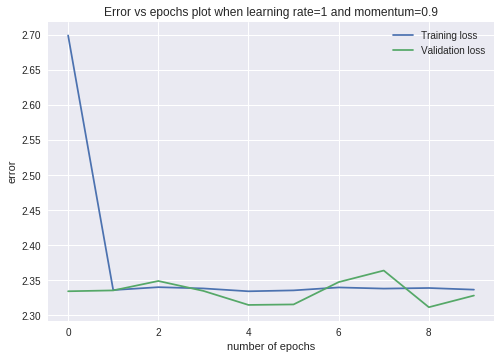

Learning rate:1 momentum:0.8
Epoch: 1/10..  Training Loss: 2.375..  Test Loss: 2.325..  Test Accuracy: 12.500
Epoch: 2/10..  Training Loss: 2.319..  Test Loss: 2.325..  Test Accuracy: 9.375
Epoch: 3/10..  Training Loss: 2.320..  Test Loss: 2.326..  Test Accuracy: 0.000
Epoch: 4/10..  Training Loss: 2.320..  Test Loss: 2.322..  Test Accuracy: 3.125
Epoch: 5/10..  Training Loss: 2.319..  Test Loss: 2.306..  Test Accuracy: 3.125
Epoch: 6/10..  Training Loss: 2.319..  Test Loss: 2.311..  Test Accuracy: 6.250
Epoch: 7/10..  Training Loss: 2.320..  Test Loss: 2.328..  Test Accuracy: 18.750
Epoch: 8/10..  Training Loss: 2.319..  Test Loss: 2.331..  Test Accuracy: 3.125
Epoch: 9/10..  Training Loss: 2.320..  Test Loss: 2.307..  Test Accuracy: 6.250
Epoch: 10/10..  Training Loss: 2.319..  Test Loss: 2.317..  Test Accuracy: 12.500


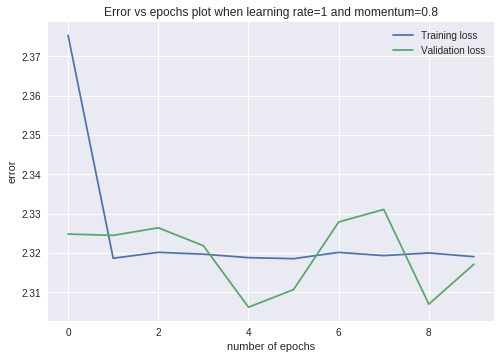

Learning rate:1 momentum:0.7
Epoch: 1/10..  Training Loss: 2.864..  Test Loss: 2.319..  Test Accuracy: 12.500
Epoch: 2/10..  Training Loss: 2.313..  Test Loss: 2.320..  Test Accuracy: 9.375
Epoch: 3/10..  Training Loss: 2.356..  Test Loss: 2.318..  Test Accuracy: 6.250
Epoch: 4/10..  Training Loss: 2.314..  Test Loss: 2.315..  Test Accuracy: 3.125
Epoch: 5/10..  Training Loss: 2.313..  Test Loss: 2.304..  Test Accuracy: 3.125
Epoch: 6/10..  Training Loss: 2.313..  Test Loss: 2.310..  Test Accuracy: 6.250
Epoch: 7/10..  Training Loss: 2.314..  Test Loss: 2.320..  Test Accuracy: 18.750
Epoch: 8/10..  Training Loss: 2.313..  Test Loss: 2.319..  Test Accuracy: 3.125
Epoch: 9/10..  Training Loss: 2.314..  Test Loss: 2.305..  Test Accuracy: 6.250
Epoch: 10/10..  Training Loss: 2.313..  Test Loss: 2.312..  Test Accuracy: 12.500


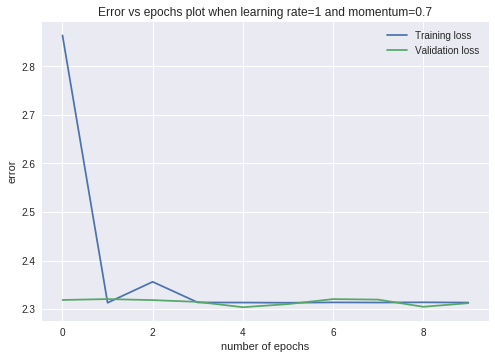

Learning rate:0.1 momentum:0.9
Epoch: 1/10..  Training Loss: 0.739..  Test Loss: 0.487..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.625..  Test Loss: 0.625..  Test Accuracy: 81.250
Epoch: 3/10..  Training Loss: 0.543..  Test Loss: 0.870..  Test Accuracy: 75.000
Epoch: 4/10..  Training Loss: 0.664..  Test Loss: 1.024..  Test Accuracy: 62.500
Epoch: 5/10..  Training Loss: 1.160..  Test Loss: 1.514..  Test Accuracy: 40.625
Epoch: 6/10..  Training Loss: 1.405..  Test Loss: 2.310..  Test Accuracy: 6.250
Epoch: 7/10..  Training Loss: 2.305..  Test Loss: 2.306..  Test Accuracy: 3.125
Epoch: 8/10..  Training Loss: 2.305..  Test Loss: 2.303..  Test Accuracy: 21.875
Epoch: 9/10..  Training Loss: 2.305..  Test Loss: 2.302..  Test Accuracy: 6.250
Epoch: 10/10..  Training Loss: 2.305..  Test Loss: 2.305..  Test Accuracy: 6.250


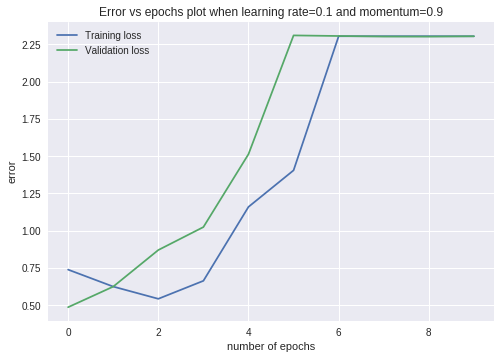

Learning rate:0.1 momentum:0.8
Epoch: 1/10..  Training Loss: 0.398..  Test Loss: 0.231..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.199..  Test Loss: 0.184..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.158..  Test Loss: 0.179..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.147..  Test Loss: 0.182..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.131..  Test Loss: 0.193..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.115..  Test Loss: 0.114..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.105..  Test Loss: 0.127..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.102..  Test Loss: 0.148..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.096..  Test Loss: 0.138..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.090..  Test Loss: 0.147..  Test Accuracy: 96.875


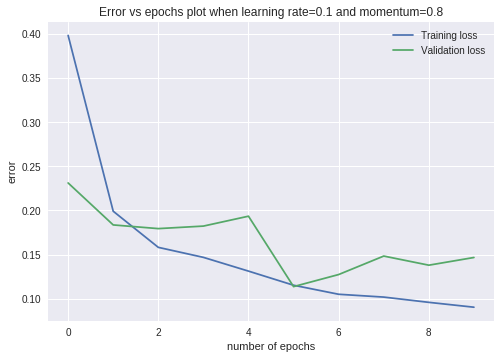

Learning rate:0.1 momentum:0.7
Epoch: 1/10..  Training Loss: 0.360..  Test Loss: 0.165..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.158..  Test Loss: 0.163..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.121..  Test Loss: 0.112..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.104..  Test Loss: 0.134..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.091..  Test Loss: 0.112..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.078..  Test Loss: 0.110..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.070..  Test Loss: 0.119..  Test Accuracy: 93.750
Epoch: 8/10..  Training Loss: 0.062..  Test Loss: 0.149..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.060..  Test Loss: 0.105..  Test Accuracy: 100.000
Epoch: 10/10..  Training Loss: 0.056..  Test Loss: 0.093..  Test Accuracy: 100.000


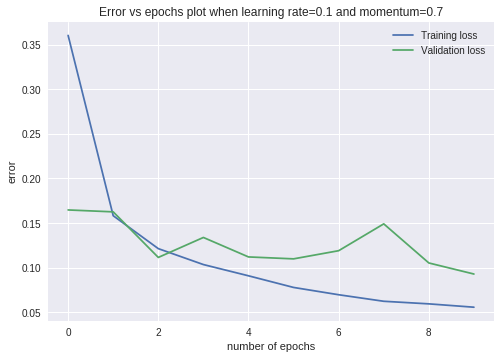

Learning rate:0.09 momentum:0.9
Epoch: 1/10..  Training Loss: 0.632..  Test Loss: 0.401..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.429..  Test Loss: 0.403..  Test Accuracy: 93.750
Epoch: 3/10..  Training Loss: 0.397..  Test Loss: 0.371..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.384..  Test Loss: 0.318..  Test Accuracy: 93.750
Epoch: 5/10..  Training Loss: 0.360..  Test Loss: 0.397..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.337..  Test Loss: 0.318..  Test Accuracy: 93.750
Epoch: 7/10..  Training Loss: 0.362..  Test Loss: 0.356..  Test Accuracy: 90.625
Epoch: 8/10..  Training Loss: 0.337..  Test Loss: 0.380..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.308..  Test Loss: 0.360..  Test Accuracy: 90.625
Epoch: 10/10..  Training Loss: 0.301..  Test Loss: 0.296..  Test Accuracy: 93.750


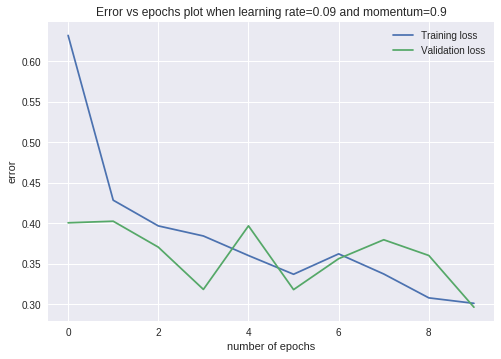

Learning rate:0.09 momentum:0.8
Epoch: 1/10..  Training Loss: 0.381..  Test Loss: 0.187..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.191..  Test Loss: 0.222..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.151..  Test Loss: 0.157..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.130..  Test Loss: 0.201..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.111..  Test Loss: 0.123..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.103..  Test Loss: 0.124..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.093..  Test Loss: 0.121..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.087..  Test Loss: 0.152..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.083..  Test Loss: 0.190..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.081..  Test Loss: 0.189..  Test Accuracy: 96.875


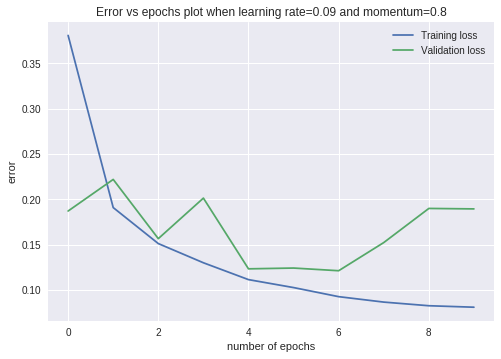

Learning rate:0.09 momentum:0.7
Epoch: 1/10..  Training Loss: 0.344..  Test Loss: 0.174..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.158..  Test Loss: 0.149..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.118..  Test Loss: 0.129..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.101..  Test Loss: 0.141..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.085..  Test Loss: 0.129..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.074..  Test Loss: 0.083..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.064..  Test Loss: 0.099..  Test Accuracy: 90.625
Epoch: 8/10..  Training Loss: 0.058..  Test Loss: 0.128..  Test Accuracy: 96.875
Epoch: 9/10..  Training Loss: 0.055..  Test Loss: 0.101..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.047..  Test Loss: 0.085..  Test Accuracy: 100.000


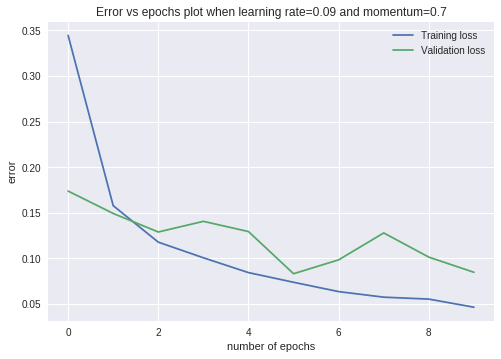

Learning rate:0.08 momentum:0.9
Epoch: 1/10..  Training Loss: 0.516..  Test Loss: 0.364..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.341..  Test Loss: 0.342..  Test Accuracy: 93.750
Epoch: 3/10..  Training Loss: 0.308..  Test Loss: 0.325..  Test Accuracy: 84.375
Epoch: 4/10..  Training Loss: 0.289..  Test Loss: 0.328..  Test Accuracy: 96.875
Epoch: 5/10..  Training Loss: 0.275..  Test Loss: 0.270..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.258..  Test Loss: 0.259..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.250..  Test Loss: 0.224..  Test Accuracy: 93.750
Epoch: 8/10..  Training Loss: 0.229..  Test Loss: 0.275..  Test Accuracy: 90.625
Epoch: 9/10..  Training Loss: 0.217..  Test Loss: 0.260..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.211..  Test Loss: 0.210..  Test Accuracy: 93.750


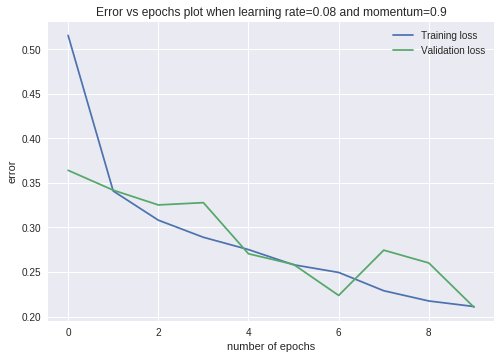

Learning rate:0.08 momentum:0.8
Epoch: 1/10..  Training Loss: 0.359..  Test Loss: 0.278..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.171..  Test Loss: 0.192..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.135..  Test Loss: 0.161..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.116..  Test Loss: 0.164..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.099..  Test Loss: 0.098..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.088..  Test Loss: 0.114..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.080..  Test Loss: 0.104..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.071..  Test Loss: 0.126..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.068..  Test Loss: 0.161..  Test Accuracy: 96.875
Epoch: 10/10..  Training Loss: 0.064..  Test Loss: 0.097..  Test Accuracy: 100.000


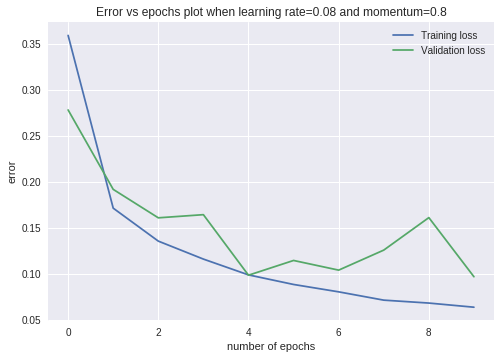

Learning rate:0.08 momentum:0.7
Epoch: 1/10..  Training Loss: 0.359..  Test Loss: 0.155..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.153..  Test Loss: 0.157..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.115..  Test Loss: 0.120..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.096..  Test Loss: 0.108..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.083..  Test Loss: 0.093..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.069..  Test Loss: 0.097..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.062..  Test Loss: 0.083..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.057..  Test Loss: 0.131..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.051..  Test Loss: 0.094..  Test Accuracy: 96.875
Epoch: 10/10..  Training Loss: 0.043..  Test Loss: 0.087..  Test Accuracy: 100.000


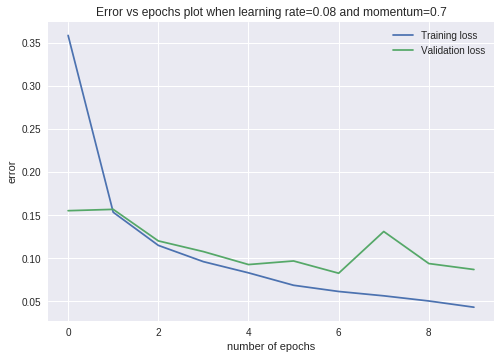

Learning rate:0.1 momentum:0.9
Epoch: 1/10..  Training Loss: 0.739..  Test Loss: 0.487..  Test Accuracy: 93.750
Epoch: 2/10..  Training Loss: 0.625..  Test Loss: 0.625..  Test Accuracy: 81.250
Epoch: 3/10..  Training Loss: 0.543..  Test Loss: 0.870..  Test Accuracy: 75.000
Epoch: 4/10..  Training Loss: 0.664..  Test Loss: 1.024..  Test Accuracy: 62.500
Epoch: 5/10..  Training Loss: 1.160..  Test Loss: 1.514..  Test Accuracy: 40.625
Epoch: 6/10..  Training Loss: 1.405..  Test Loss: 2.310..  Test Accuracy: 6.250
Epoch: 7/10..  Training Loss: 2.305..  Test Loss: 2.306..  Test Accuracy: 3.125
Epoch: 8/10..  Training Loss: 2.305..  Test Loss: 2.303..  Test Accuracy: 21.875
Epoch: 9/10..  Training Loss: 2.305..  Test Loss: 2.302..  Test Accuracy: 6.250
Epoch: 10/10..  Training Loss: 2.305..  Test Loss: 2.305..  Test Accuracy: 6.250


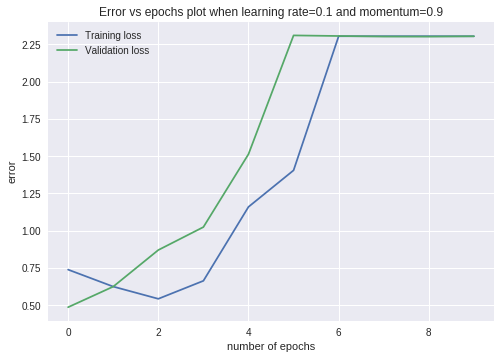

Learning rate:0.1 momentum:0.8
Epoch: 1/10..  Training Loss: 0.398..  Test Loss: 0.231..  Test Accuracy: 96.875
Epoch: 2/10..  Training Loss: 0.199..  Test Loss: 0.184..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.158..  Test Loss: 0.179..  Test Accuracy: 96.875
Epoch: 4/10..  Training Loss: 0.147..  Test Loss: 0.182..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.131..  Test Loss: 0.193..  Test Accuracy: 90.625
Epoch: 6/10..  Training Loss: 0.115..  Test Loss: 0.114..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.105..  Test Loss: 0.127..  Test Accuracy: 96.875
Epoch: 8/10..  Training Loss: 0.102..  Test Loss: 0.148..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.096..  Test Loss: 0.138..  Test Accuracy: 93.750
Epoch: 10/10..  Training Loss: 0.090..  Test Loss: 0.147..  Test Accuracy: 96.875


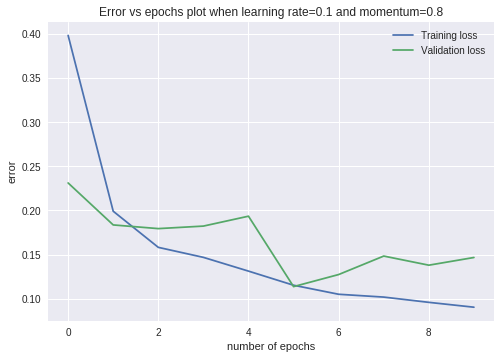

Learning rate:0.1 momentum:0.7
Epoch: 1/10..  Training Loss: 0.360..  Test Loss: 0.165..  Test Accuracy: 90.625
Epoch: 2/10..  Training Loss: 0.158..  Test Loss: 0.163..  Test Accuracy: 96.875
Epoch: 3/10..  Training Loss: 0.121..  Test Loss: 0.112..  Test Accuracy: 93.750
Epoch: 4/10..  Training Loss: 0.104..  Test Loss: 0.134..  Test Accuracy: 100.000
Epoch: 5/10..  Training Loss: 0.091..  Test Loss: 0.112..  Test Accuracy: 93.750
Epoch: 6/10..  Training Loss: 0.078..  Test Loss: 0.110..  Test Accuracy: 100.000
Epoch: 7/10..  Training Loss: 0.070..  Test Loss: 0.119..  Test Accuracy: 93.750
Epoch: 8/10..  Training Loss: 0.062..  Test Loss: 0.149..  Test Accuracy: 93.750
Epoch: 9/10..  Training Loss: 0.060..  Test Loss: 0.105..  Test Accuracy: 100.000
Epoch: 10/10..  Training Loss: 0.056..  Test Loss: 0.093..  Test Accuracy: 100.000


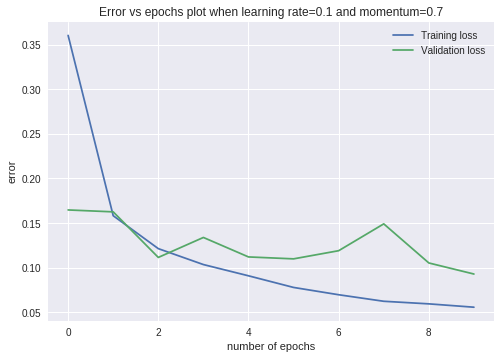

In [0]:
df = pd.DataFrame(columns=['Epoch'+str(i+1) for i in range(10)])
df = df.fillna(0) # with 0s rather than NaNs

for a in [0.001,0.002,0.004,0.003,0.006,0.009,0.02,0.03,0.01,0.07,1,0.1,0.09,0.08,0.1]:
  for b in [0.9,0.8,0.7]:
    model3.load_state_dict(torch.load('initial3.pth'))
    train(a,b,df)